In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"C:\Users\Reetuja Maity\Downloads\archive (6).zip")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


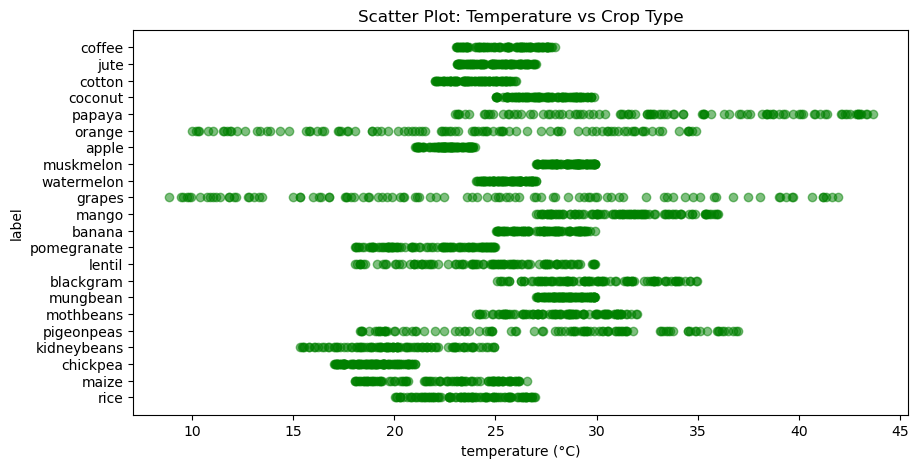

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['temperature'], df['label'], alpha=0.5, c='green')
plt.xlabel("temperature (°C)")
plt.ylabel("label")
plt.title("Scatter Plot: Temperature vs Crop Type")
plt.show()

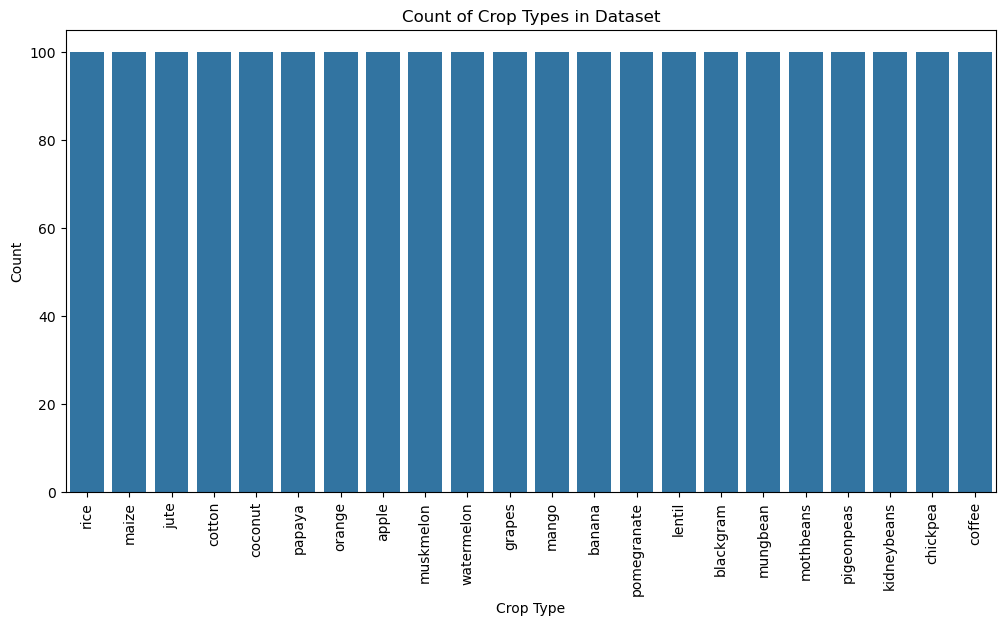

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Count of Crop Types in Dataset")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()

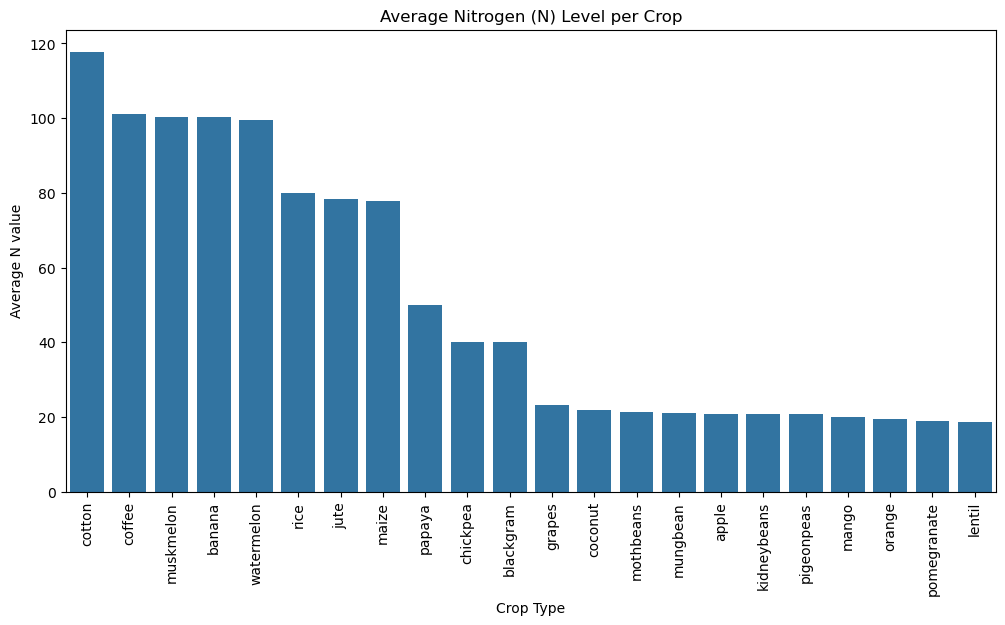

In [8]:
plt.figure(figsize=(12,6))
avg_N = df.groupby('label')['N'].mean().sort_values(ascending=False)
sns.barplot(x=avg_N.index, y=avg_N.values)
plt.xticks(rotation=90)
plt.title("Average Nitrogen (N) Level per Crop")
plt.xlabel("Crop Type")
plt.ylabel("Average N value")
plt.show()


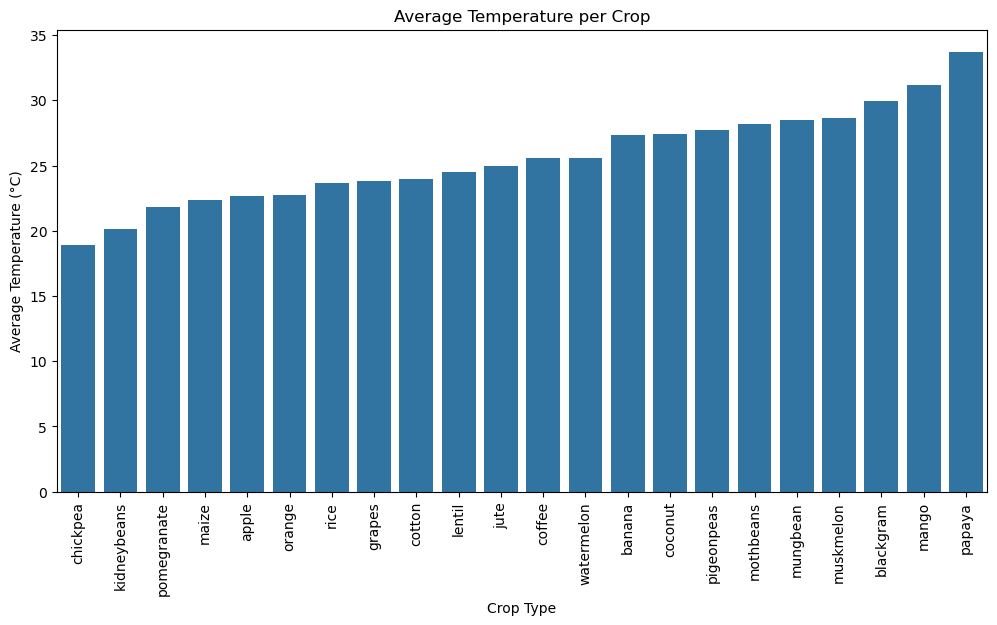

In [9]:
plt.figure(figsize=(12,6))
avg_temp = df.groupby('label')['temperature'].mean().sort_values()
sns.barplot(x=avg_temp.index, y=avg_temp.values)
plt.xticks(rotation=90)
plt.title("Average Temperature per Crop")
plt.xlabel("Crop Type")
plt.ylabel("Average Temperature (°C)")
plt.show()


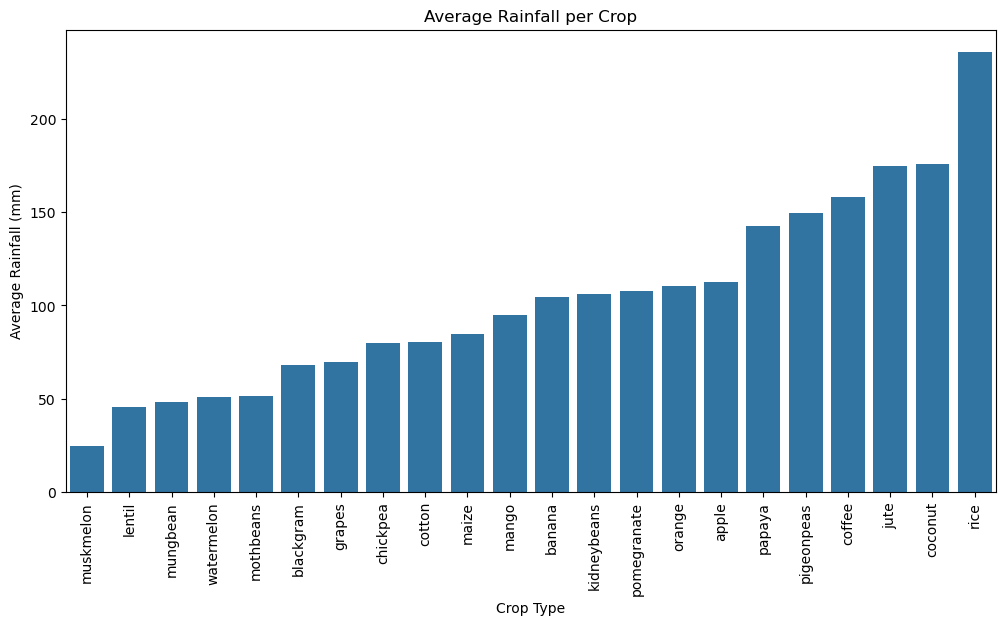

In [10]:
plt.figure(figsize=(12,6))
avg_rain = df.groupby('label')['rainfall'].mean().sort_values()
sns.barplot(x=avg_rain.index, y=avg_rain.values)
plt.xticks(rotation=90)
plt.title("Average Rainfall per Crop")
plt.xlabel("Crop Type")
plt.ylabel("Average Rainfall (mm)")
plt.show()


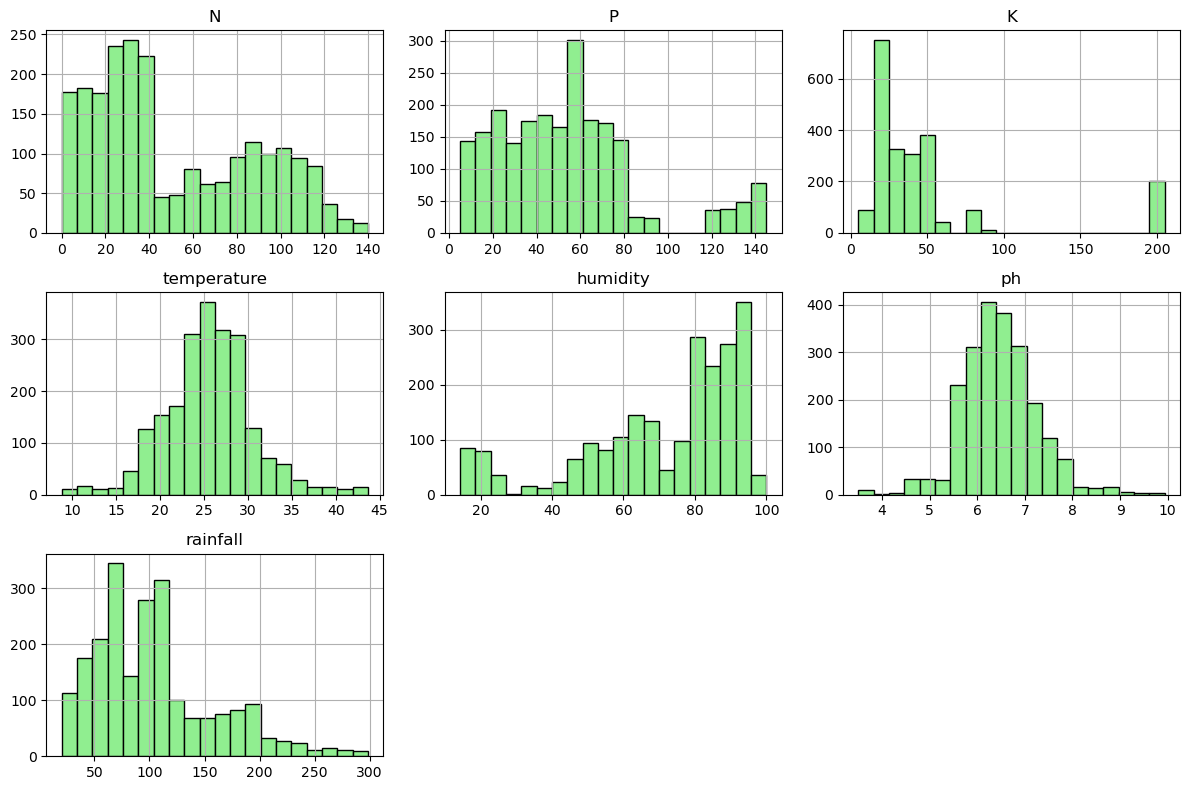

In [15]:
numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall']

df[numeric_cols].hist(figsize=(12,8), bins=20, color='lightgreen', edgecolor='black')
plt.tight_layout()
plt.show()


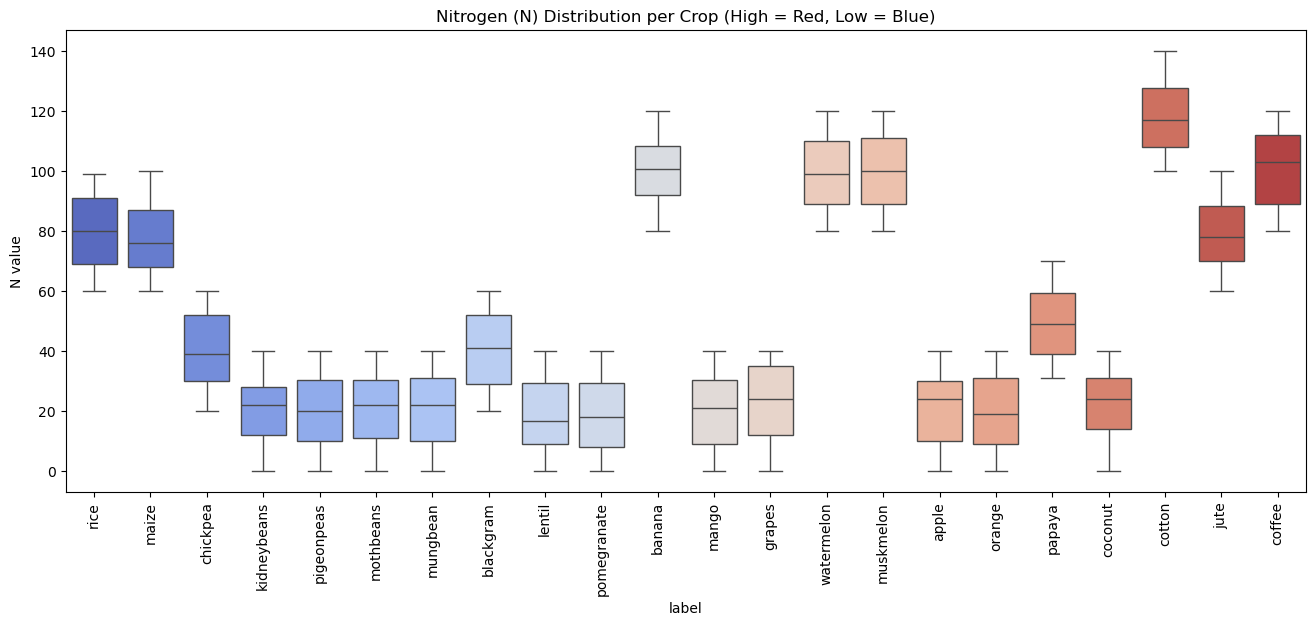

In [9]:
plt.figure(figsize=(16,6))
sns.boxplot(x='label', y='N', data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Nitrogen (N) Distribution per Crop (High = Red, Low = Blue)")
plt.ylabel("N value")
plt.show()


<Figure size 1200x800 with 0 Axes>

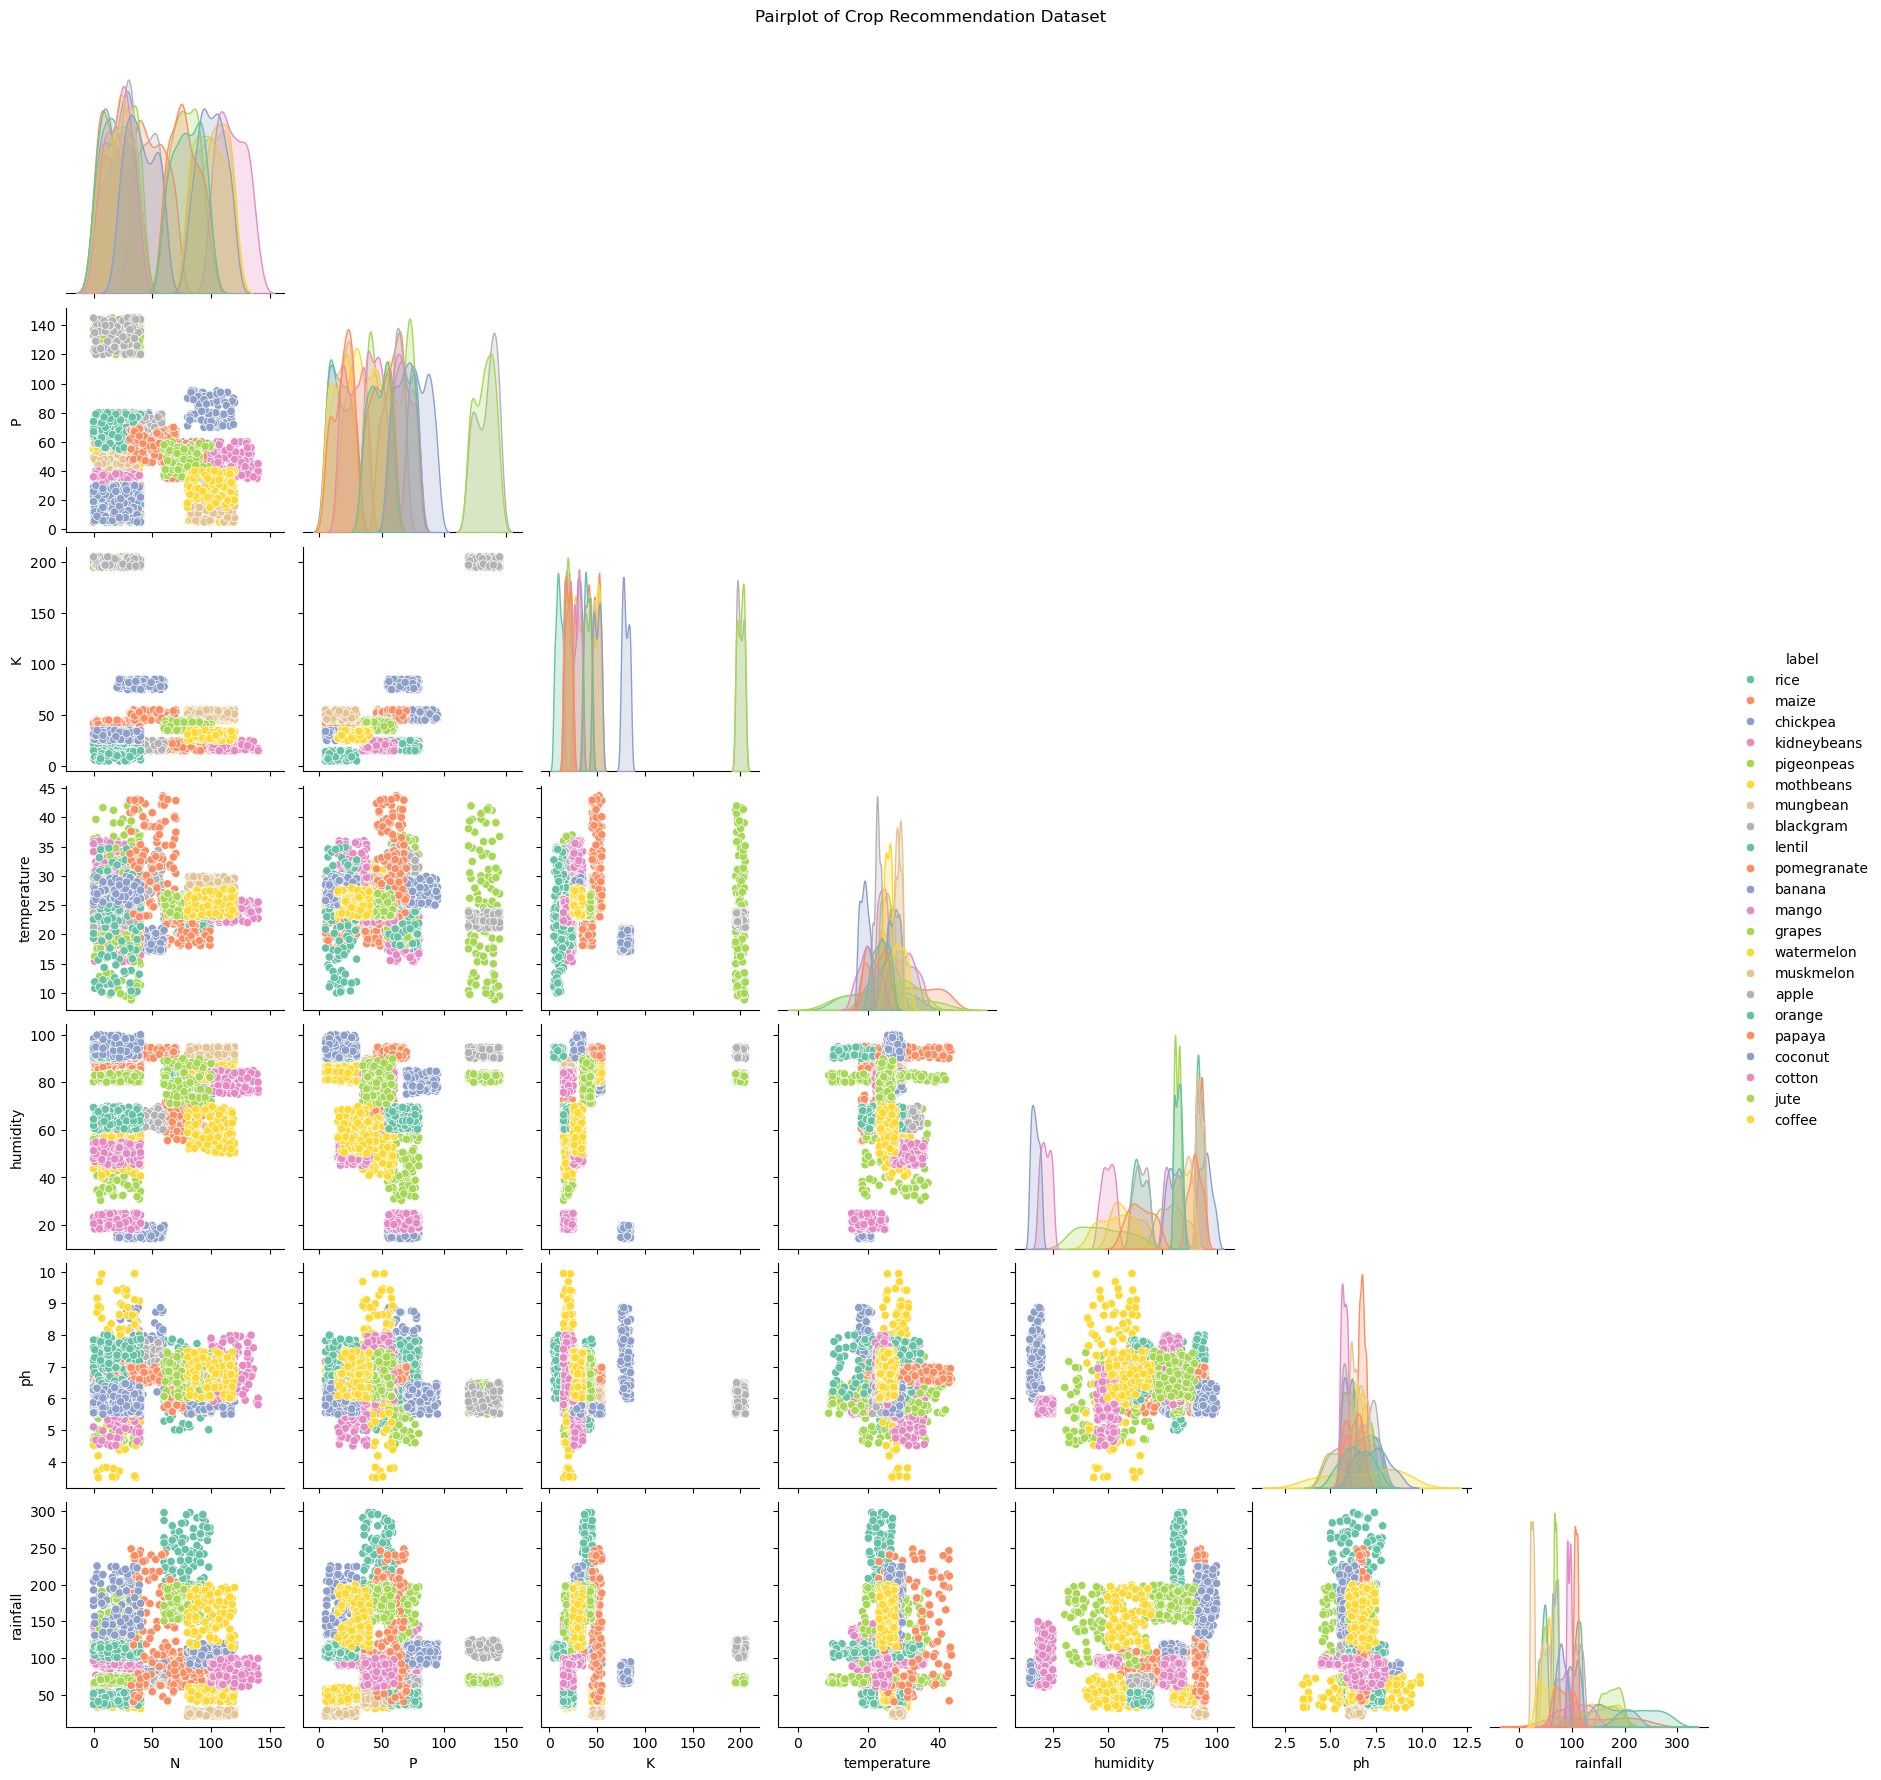

In [20]:
numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall','label']
plt.figure(figsize=(12,8))
sns.pairplot(df[numeric_cols], hue='label', corner=True, diag_kind='kde', palette="Set2")
plt.suptitle("Pairplot of Crop Recommendation Dataset", y=1.02)
plt.show()


In [19]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


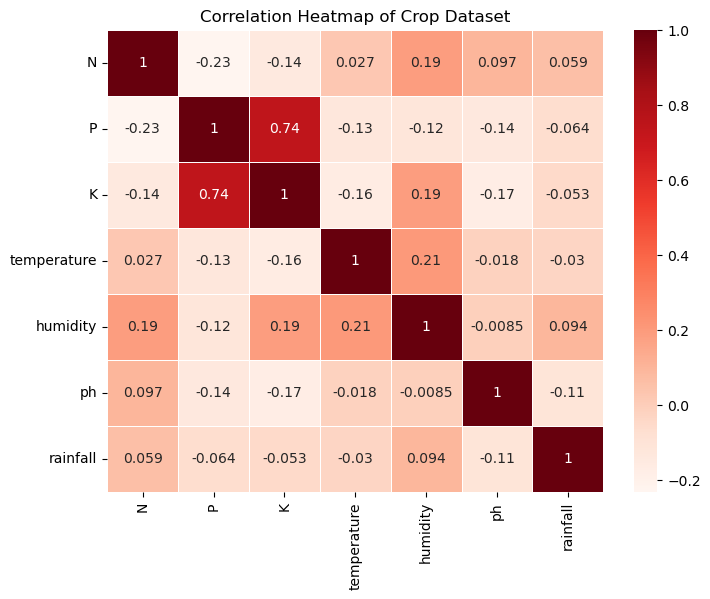

In [18]:
numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall']
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Reds", linewidths=0.5)
plt.title("Correlation Heatmap of Crop Dataset")
plt.show()
